<a href="https://colab.research.google.com/github/brinda-lax/DA/blob/main/python_based_Aviation_Insights_from_'2020_07_07'_to_'2025_05_03'_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
daily=pd.read_csv('daily.csv')

In [ ]:
daily.columns

Index(['Date', 'Domestic (Aircraft Movements)', 'Domestic (Airport Footfalls)',
       'Domestic (Arrival Flights)', 'Domestic (Arriving Pax)',
       'Domestic (Departing Pax)', 'Domestic (Departure Flights)',
       'International (Aircraft Movements)',
       'International (Airport Footfalls)', 'International (Arrival Flights)',
       ...
       'Vande Bharat Mission (Inbound Pax)',
       'Vande Bharat Mission (Outbound Flights)',
       'Vande Bharat Mission (Outbound Pax)',
       'Vande Bharat Mission (Passengers Till Date)',
       'Vande Bharat Mission - Arrivals (Air India Group)',
       'Vande Bharat Mission - Arrivals (By Land)',
       'Vande Bharat Mission - Arrivals (Chartered)',
       'Vande Bharat Mission - Arrivals (Naval Ships)',
       'Vande Bharat Mission - Arrivals (Others)',
       'Vande Bharat Mission - Arrivals (Total)'],
      dtype='object', length=166)

In [ ]:
city=pd.read_csv('city.csv')

In [ ]:
city.columns

Index(['Year', 'Month', 'City1', 'City2', 'PaxToCity2', 'PaxFromCity2',
       'FreightToCity2', 'FreightFromCity2', 'MailToCity2', 'MailFromCity2'],
      dtype='object')

In [ ]:
carrier=pd.read_csv('carrier.csv')

In [ ]:
carrier.columns

Index(['Type', 'Airline', 'Year', 'Month', 'Aircraft Number', 'Aircraft Hours',
       'Aircraft Kilometres', 'Passenger Number', 'Passenger Kilometers',
       'Seat Kilometers', 'Passenger Load Factor', 'Freight', 'Mail',
       'Total Cargo', 'Passenger Tonne Kilometer', 'Mail Tonne Kilometer',
       'Freight Tonne Kilometer', 'Total Tonne Kilometer',
       'Available Tonne Kilometer', 'Weight Load Factor'],
      dtype='object')

In [ ]:
daily_needed_cols=[
    'Date',
    'Domestic (Airport Footfalls)',
    'Domestic (Arriving Pax)',
    'Domestic (Departing Pax)',
    'Domestic (Arrival Flights)',
    'Domestic (Departure Flights)',
    'International (Arrival Flights)',
    'International (Departure Flights)',
    'International (Airport Footfalls)'
]
daily=daily[daily_needed_cols]

In [ ]:
city_needed_cols=['Year', 'Month', 'City1', 'City2', 'PaxToCity2', 'PaxFromCity2']
city=city[city_needed_cols]



In [ ]:
carrier_needed_cols=['Type', 'Airline', 'Year', 'Month', 'Aircraft Number', 'Aircraft Hours']
carrier=carrier[carrier_needed_cols]

In [ ]:
daily.columns

Index(['Date', 'Domestic (Airport Footfalls)', 'Domestic (Arriving Pax)',
       'Domestic (Departing Pax)', 'Domestic (Arrival Flights)',
       'Domestic (Departure Flights)', 'International (Arrival Flights)',
       'International (Departure Flights)',
       'International (Airport Footfalls)'],
      dtype='object')

## Daily Footfalls including domestic international ##

In [ ]:
daily[['Domestic (Airport Footfalls)','Domestic (Arriving Pax)','Domestic (Departing Pax)']]

,Domestic (Airport Footfalls),Domestic (Arriving Pax),Domestic (Departing Pax)
0,121838,60326,61512
1,125370,62395,62975
2,180099,89322,90777
3,158958,78766,80192
4,183526,89887,93639
...,...,...,...
848,970957,482683,488274
849,966725,482380,484345
850,967864,483908,483956
851,922793,462499,460294


In [ ]:
daily['Total_foot_falls']=daily['Domestic (Airport Footfalls)']+daily['International (Airport Footfalls)']

In [ ]:
Total_foot_fall=daily['Total_foot_falls'].sum()

In [ ]:
print(f"Total footfalls across period: {Total_foot_fall:,}")

Total footfalls across period: 824,591,087.0


In [ ]:
daily['Total_foot_falls'].idxmax()

737

In [ ]:
min_row_index=daily['Total_foot_falls'].idxmin()
min_row_index

33

In [ ]:
max_row=daily.iloc[737]

In [ ]:
min_row=daily.iloc[33]

In [ ]:
print(f" Max passengers entered and exited in airport was on Date {max_row['Date']} with {max_row['Total_foot_falls']:,} footfalls.")


In [ ]:
print(f" Max passengers entered and exited in airport was on Date {min_row['Date']} with {min_row['Total_foot_falls']:,} footfalls.")


 Max passengers entered and exited in airport was on Date 2021-07-22 with 297,233.0 footfalls.


In [ ]:
daily['Date'].max()

'2025-05-03'

Daily report includes various columns like daily footfall and dates over period ranging from '2020-07-07' to '2025-05-03'

️ **Daily Average Footfall**


In [ ]:
Avg_foot_fall=round(daily['Total_foot_falls'].mean(),2)
Avg_foot_fall

1004374.04

**Busiest Days Summary**

In [ ]:
top_days = daily.nlargest(5, 'Total_foot_falls')[['Date', 'Total_foot_falls']]
print(top_days)


           Date  Total_foot_falls
737  2024-12-10         1493747.0
790  2025-02-23         1312369.0
784  2025-02-17         1308083.0
783  2025-02-16         1305494.0
788  2025-02-21         1298887.0


In [ ]:
bottom_days = daily.nsmallest(5, 'Total_foot_falls')[['Date', 'Total_foot_falls']]
print(bottom_days)

           Date  Total_foot_falls
33   2021-07-22          297233.0
34   2021-07-29          307096.0
32   2021-07-21          337701.0
35   2021-07-30          341870.0
104  2022-01-18          368656.0


️ **Monthly Trend**


In [ ]:
daily['Date']=pd.to_datetime(daily['Date'])

In [ ]:
#daily['Date'] = pd.to_datetime(daily['Date'])
daily['Month Name'] = daily['Date'].dt.strftime('%B')

monthly_footfall = daily.groupby('Month Name')['Total_foot_falls'].sum().reset_index()
print(monthly_footfall)

   Month Name  Total_foot_falls
0       April       102950799.0
1      August        46958218.0
2    December        73226299.0
3    February        81779987.0
4     January        63285168.0
5        July        59544298.0
6        June        55897196.0
7       March       103647824.0
8         May        73053416.0
9    November        69375648.0
10    October        58969560.0
11  September        35902674.0


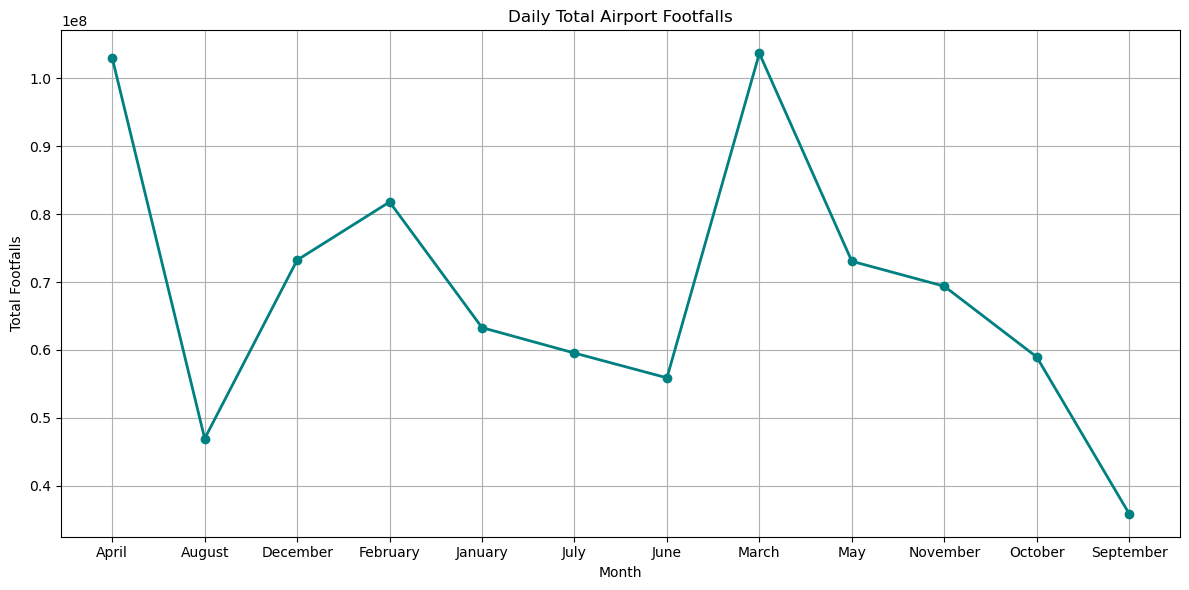

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(monthly_footfall['Month Name'], monthly_footfall['Total_foot_falls'], color='teal', linewidth=2,marker='o')
plt.title('Daily Total Airport Footfalls')
plt.xlabel('Month')
plt.ylabel('Total Footfalls')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
daily.columns

Index(['Date', 'Domestic (Airport Footfalls)', 'Domestic (Arriving Pax)',
       'Domestic (Departing Pax)', 'Domestic (Arrival Flights)',
       'Domestic (Departure Flights)', 'International (Arrival Flights)',
       'International (Departure Flights)',
       'International (Airport Footfalls)', 'Total_foot_falls', 'Month',
       'Month Name'],
      dtype='object')

In [ ]:
city.tail()

,Year,Month,City1,City2,PaxToCity2,PaxFromCity2
56042,2025,2,VIJAYAWADA,VISAKHAPATNAM,5510.0,5304.0
56043,2025,3,VIJAYAWADA,VISAKHAPATNAM,6011.0,5003.0
56044,2022,11,ZIRO,DIBRUGARH,4.0,8.0
56045,2022,11,ZIRO,LILABARI,3.0,23.0
56046,2022,10,Zero Airport,DIBRUGARH,4.0,1.0


In [ ]:
city['Month']=pd.to_datetime(city['Month'])


In [ ]:
city['Month Name'] = city['Month'].dt.strftime('%B')


In [ ]:
city.drop(columns='Month',inplace=True)

In [ ]:
city.head(3)

,Year,City1,City2,PaxToCity2,PaxFromCity2,Month Name
0,2021,ADAMPUR,AHMEDABAD,30.0,0.0,January
1,2018,ADAMPUR,DELHI,2258.0,2190.0,January
2,2018,ADAMPUR,DELHI,1984.0,1981.0,January


In [ ]:
city_and_daily=pd.merge(city,daily,on='Month Name',how='inner')

In [ ]:
city_and_daily.columns

Index(['Year', 'City1', 'City2', 'PaxToCity2', 'PaxFromCity2', 'Month Name',
       'Date', 'Domestic (Airport Footfalls)', 'Domestic (Arriving Pax)',
       'Domestic (Departing Pax)', 'Domestic (Arrival Flights)',
       'Domestic (Departure Flights)', 'International (Arrival Flights)',
       'International (Departure Flights)',
       'International (Airport Footfalls)', 'Total_foot_falls', 'Month'],
      dtype='object')

In [ ]:
city_and_daily.isna().sum()

Year                                 0
City1                                0
City2                                0
PaxToCity2                           0
PaxFromCity2                         0
Month Name                           0
Date                                 0
Domestic (Airport Footfalls)         0
Domestic (Arriving Pax)              0
Domestic (Departing Pax)             0
Domestic (Arrival Flights)           0
Domestic (Departure Flights)         0
International (Arrival Flights)      0
International (Departure Flights)    0
International (Airport Footfalls)    0
Total_foot_falls                     0
Month                                0
dtype: int64

In [ ]:
international_mean_arrival=city_and_daily['International (Arrival Flights)'].mean()

In [ ]:
city_and_daily['International (Arrival Flights)']=city_and_daily['International (Arrival Flights)'].fillna(international_mean_arrival)

In [ ]:
International_Departure_Flights_mean=city_and_daily['International (Departure Flights)'].mean()
International_Airport_Footfalls_mean=city_and_daily['International (Airport Footfalls)'].mean()
Total_foot_falls_mean=city_and_daily['Total_foot_falls'].mean()

In [ ]:
city_and_daily['International (Departure Flights)']=city_and_daily['International (Departure Flights)'].fillna(International_Departure_Flights_mean)
city_and_daily['International (Airport Footfalls)']=city_and_daily['International (Airport Footfalls)'].fillna(International_Airport_Footfalls_mean)
city_and_daily['Total_foot_falls']=city_and_daily['Total_foot_falls'].fillna(Total_foot_falls_mean)

In [ ]:
city_and_daily.tail()

,Year,City1,City2,PaxToCity2,PaxFromCity2,Month Name,Date,Domestic (Airport Footfalls),Domestic (Arriving Pax),Domestic (Departing Pax),Domestic (Arrival Flights),Domestic (Departure Flights),International (Arrival Flights),International (Departure Flights),International (Airport Footfalls),Total_foot_falls,Month
4315614,2022,Zero Airport,DIBRUGARH,4.0,1.0,January,2025-01-07,980482,489508,490974,3184,3183,621.0,621.0,230138.0,1210620.0,2025-01
4315615,2022,Zero Airport,DIBRUGARH,4.0,1.0,January,2025-01-28,965398,482756,482642,3199,3206,608.0,613.0,213937.0,1179335.0,2025-01
4315616,2022,Zero Airport,DIBRUGARH,4.0,1.0,January,2025-01-29,956181,477659,478522,3177,3182,663.0,586.0,219472.0,1175653.0,2025-01
4315617,2022,Zero Airport,DIBRUGARH,4.0,1.0,January,2025-01-30,974004,486012,487992,3206,3203,650.0,601.0,225000.0,1199004.0,2025-01
4315618,2022,Zero Airport,DIBRUGARH,4.0,1.0,January,2025-01-31,997458,498462,498996,3201,3197,662.0,591.0,234359.0,1231817.0,2025-01


In [ ]:
city_top_footfalls=city_and_daily.groupby('City1')['Total_foot_falls'].max().sort_values(ascending=True).reset_index()

In [ ]:
city_top_footfalls=city_top_footfalls.rename(columns={'City1':'City','Total_foot_falls':'Avg FootFalls'})

In [ ]:
city_top_footfalls.head()

,City,Avg FootFalls
0,ADAMPUR,1232466.0
1,Malvan,1232466.0
2,MYSORE,1232466.0
3,MUMBAI,1232466.0
4,"MOPA, GOA",1232466.0


In [ ]:
top_city_pairs = (
    city_and_daily.groupby(['City1', 'City2'])[['PaxToCity2', 'PaxFromCity2']]
    .mean()
    .sort_values(by='PaxToCity2', ascending=False)
    .head(10)
)
print(top_city_pairs)

                        PaxToCity2   PaxFromCity2
City1     City2                                  
MUMBAI    DELHI      276149.305085  276892.406780
DELHI     MUMBAI     204150.796610  203666.305085
BENGALURU DELHI      157424.722689  157435.403361
          MUMBAI     133297.092437  133860.647059
KOLKATA   DELHI      113868.755102  119994.653061
DELHI     HYDERABAD  102750.478632  103598.435897
          KOLKATA    102430.623188   97661.753623
MUMBAI    GOA         99146.777778  100477.000000
DELHI     CHENNAI     98424.897959   99242.897959
          PUNE        95195.794872   94732.521368


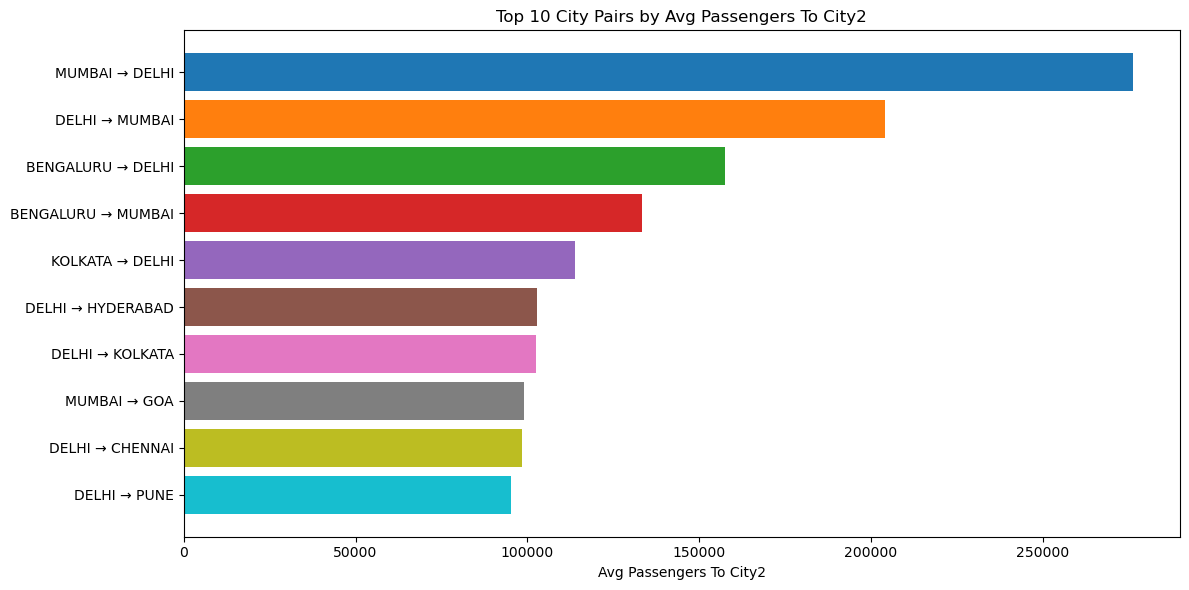

In [ ]:
import matplotlib.pyplot as plt

# Reset index and create City Pair label
top_city_pairs = top_city_pairs.reset_index()
top_city_pairs['City Pair'] = top_city_pairs['City1'] + ' → ' + top_city_pairs['City2']

# Generate unique colors using a colormap
colors = plt.cm.tab10.colors  # Can change to plt.cm.Set3, plt.cm.Paired, etc.
color_list = [colors[i % len(colors)] for i in range(len(top_city_pairs))]

# Plot
plt.figure(figsize=(12, 6))
plt.barh(top_city_pairs['City Pair'], top_city_pairs['PaxToCity2'], color=color_list)
plt.xlabel('Avg Passengers To City2')
plt.title('Top 10 City Pairs by Avg Passengers To City2')
plt.gca().invert_yaxis()  # So largest is on top
plt.tight_layout()
plt.show()


In [ ]:
city_and_daily=city_and_daily.iloc[:1000]

In [ ]:
city_and_daily.to_csv('city_daily.csv')

In [ ]:
city_and_daily.shape

(4315619, 17)